In [1]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500, centers=4, n_features=2,\
random_state=10,cluster_std=1)
print(Y)
Y = (Y==1).astype(int)
print(Y)

[2 0 2 2 0 0 2 2 0 3 0 0 1 1 3 1 3 0 0 2 0 3 1 2 3 2 3 0 2 2 1 1 3 1 0 1 0
 2 1 2 2 2 1 1 1 0 2 0 1 3 3 2 0 3 1 2 1 0 1 0 1 2 1 1 2 3 2 2 2 3 3 1 2 2
 2 3 3 1 2 1 2 0 2 0 2 1 1 3 0 0 1 1 2 1 0 2 0 2 1 3 2 3 3 3 1 1 2 1 0 1 3
 0 1 1 2 2 2 0 2 0 1 0 1 3 0 3 0 2 1 1 0 2 3 1 2 2 1 1 2 3 1 2 3 2 3 0 1 1
 0 0 1 3 0 0 3 2 3 0 3 2 1 1 0 3 1 0 0 1 2 2 3 2 3 1 2 3 2 2 2 1 0 0 1 1 1
 1 0 1 1 0 1 2 1 3 3 2 3 2 0 1 2 3 3 1 1 1 2 2 0 1 2 0 1 0 2 2 2 3 1 3 1 0
 1 1 2 0 3 3 3 3 2 3 3 0 3 3 1 2 2 3 3 0 1 2 1 0 0 3 3 3 3 3 3 1 3 3 3 0 2
 1 0 0 1 1 0 3 2 2 0 2 3 1 3 0 0 3 3 0 2 0 0 0 2 1 0 1 1 2 0 3 1 2 0 0 2 3
 2 3 0 3 0 1 3 1 1 1 0 3 0 1 1 1 2 1 1 1 3 0 2 1 1 3 2 0 3 2 2 3 0 2 3 2 2
 2 2 0 0 2 0 3 1 0 1 0 3 0 0 2 2 1 0 0 0 0 3 1 0 1 0 1 3 2 3 3 0 3 2 2 3 3
 2 3 0 2 3 2 3 0 0 0 0 0 1 2 0 1 0 3 2 0 0 3 3 1 2 2 2 1 0 1 3 0 2 3 2 0 3
 1 1 3 2 0 1 2 1 0 3 3 3 3 0 3 3 1 3 3 0 3 0 3 0 1 2 3 3 3 1 2 3 0 2 0 0 2
 1 3 0 0 3 2 2 0 2 1 3 3 0 2 2 2 1 2 2 1 1 1 3 2 1 0 3 1 0 1 2 1 3 0 0 0 2
 3 3 1 0 1 3 3 0 3 2 0 2 

In [2]:
def plot_decision_boundary(threshold, IG_list,IG_list2,p):

  x_min, x_max = X[:,0].min() -2 , X[:,0].max() + 2
  y_min, y_max = X[:,1].min() -2, X[:,1].max() + 2
  h = 0.1

  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole grid
  print('xx shape:', xx.shape)
  Xn = (np.c_[xx.ravel(),yy.ravel()])

  if(max(IG_List)>max(IG_List2)):
    B = Xn[:,0] < threshold
  else:
    B = Xn[:,1] < threshold


  PP = B.astype(int) * (p+1)


  PP = PP.reshape(xx.shape)
  print(PP.shape)

  #plt.contourf(xx, yy, PP, cmap='cool')
  plt.contour(xx, yy, PP, cmap='jet')
  plt.ylabel('x2')
  plt.xlabel('x1')

  plt.scatter(X[:,0],X[:,1],s=5,c = Y1, cmap ='jet')

3.6808328456701016
0.5365636915649645
-3.6557951805752182
-3.6557951805752182
-4.703884898610263


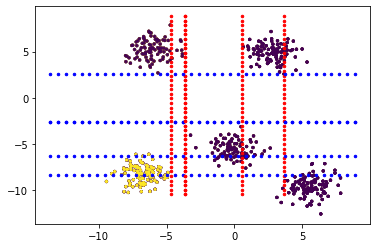

In [3]:
import numpy as np
from numpy import *
def H(p,n):
  h = 0
  
  if (p!=0 & n != 0):
    p1 = p/(p+n)
    n1= n/(p+n)
    h = -(p1*np.log2(p1) + n1*np.log2(n1))
  elif (p== 0 & n != 0):
    n1= n/(p+n)
    h = - n1*np.log2(n1)
  elif (p!= 0 & n == 0):
    p1 = p/(p+n)
    h = -p1*np.log2(p1)
  return h
  
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

for p in range(5):
  X, Y = make_blobs(n_samples=500, centers=5, n_features=2,\
  random_state=10,cluster_std=1)
  Y1 = Y
  #X = np.array([[1,1],[2,1.5],[3,1],[4,0.7]])
  #Y= np.array([1,1,0,0])
  Y = (Y==p).astype(int)
  plt.scatter(X[:,0],X[:,1],c=Y,s=5)
  total = 500
  p=250
  n=250

  E_root = H(250,250)
  #print(E_root)
  P_X = np.squeeze(X[np.where(Y==1),:])
  N_X = np.squeeze(X[np.where(Y==0),:])

  #print(P_X)
  LP = P_X.shape[0]
  LN = N_X.shape[0]
  #print(LP)

  IG_List =[]
  thr =[]
  IG_List2 =[]
  thr2 =[]

  for k in np.linspace(X.min(),X.max(),40):
    x1 = k
    x2 = k
    pos_g = 0
    neg_g = 0
    pos_l = 0
    neg_l = 0
    for m in range (P_X.shape[0]):
      if ((P_X[m,0]>x1)):
        pos_g +=1
    for i in range(N_X.shape[0]):
      if ((N_X[i,0]>x1)):
        neg_g+=1 

    for i in range (P_X.shape[0]):
      if ((P_X[i,0]<x1)):
        pos_l +=1
    for i in range(N_X.shape[0]):
      if ((N_X[i,0]<x1)):
        neg_l+=1 

    #print(pos_g,neg_g)
    #print(pos_l,neg_l)

    PplusN = pos_g+neg_g+pos_l+neg_l


    IG = E_root - ( (pos_g+neg_g)/(PplusN) * H(pos_g,neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l,neg_l))
    #print(IG)
    IG_List.append(IG)
    thr.append(x1)

    # ******************************************
    x2 = k
    pos_g = 0 # positive value greater than
    neg_g = 0
    pos_l = 0
    neg_l = 0
    for i in range (P_X.shape[0]):
      if ((P_X[i,1]>x2)):
        pos_g +=1
    for i in range(N_X.shape[0]):
      if ((N_X[i,1]>x2)):
        neg_g+=1 

    for i in range (P_X.shape[0]):
      if ((P_X[i,1]<x2)):
        pos_l +=1
    for i in range(N_X.shape[0]):
      if ((N_X[i,1]<x2)):
        neg_l+=1 

    #print(pos_g,neg_g)
    #print(pos_l,neg_l)

    PplusN = pos_g+neg_g+pos_l+neg_l


    IG2 = E_root - ( (pos_g+neg_g)/(PplusN) * H(pos_g,neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l,neg_l))
    #print(IG)
    IG_List2.append(IG2)
    thr2.append(x2)
    # ******************************************


  
  index1 = IG_List.index(max(IG_List))
  index2 = IG_List2.index(max(IG_List2))
  val = thr[index1]
  print(thr[index1])
  val2 = thr2[index2]
  y1 = np.linspace(X[:,1].min()-1,X[:,1].max()+1,40)
  y = thr2[index2] * np.ones(40)
  x1 = np.linspace(X[:,0].min()-1,X[:,0].max()+1,40)
  x = thr[index1] * np.ones(40)
  plt.plot(x,x1,'.r',ms = 5)
  plt.plot(y1,y,'.b',ms = 5)
  #plot_decision_boundary(val,IG_List,IG_List2,p)
 


#print(index)


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


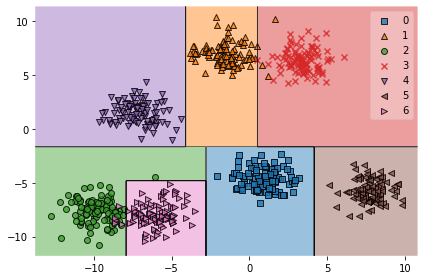

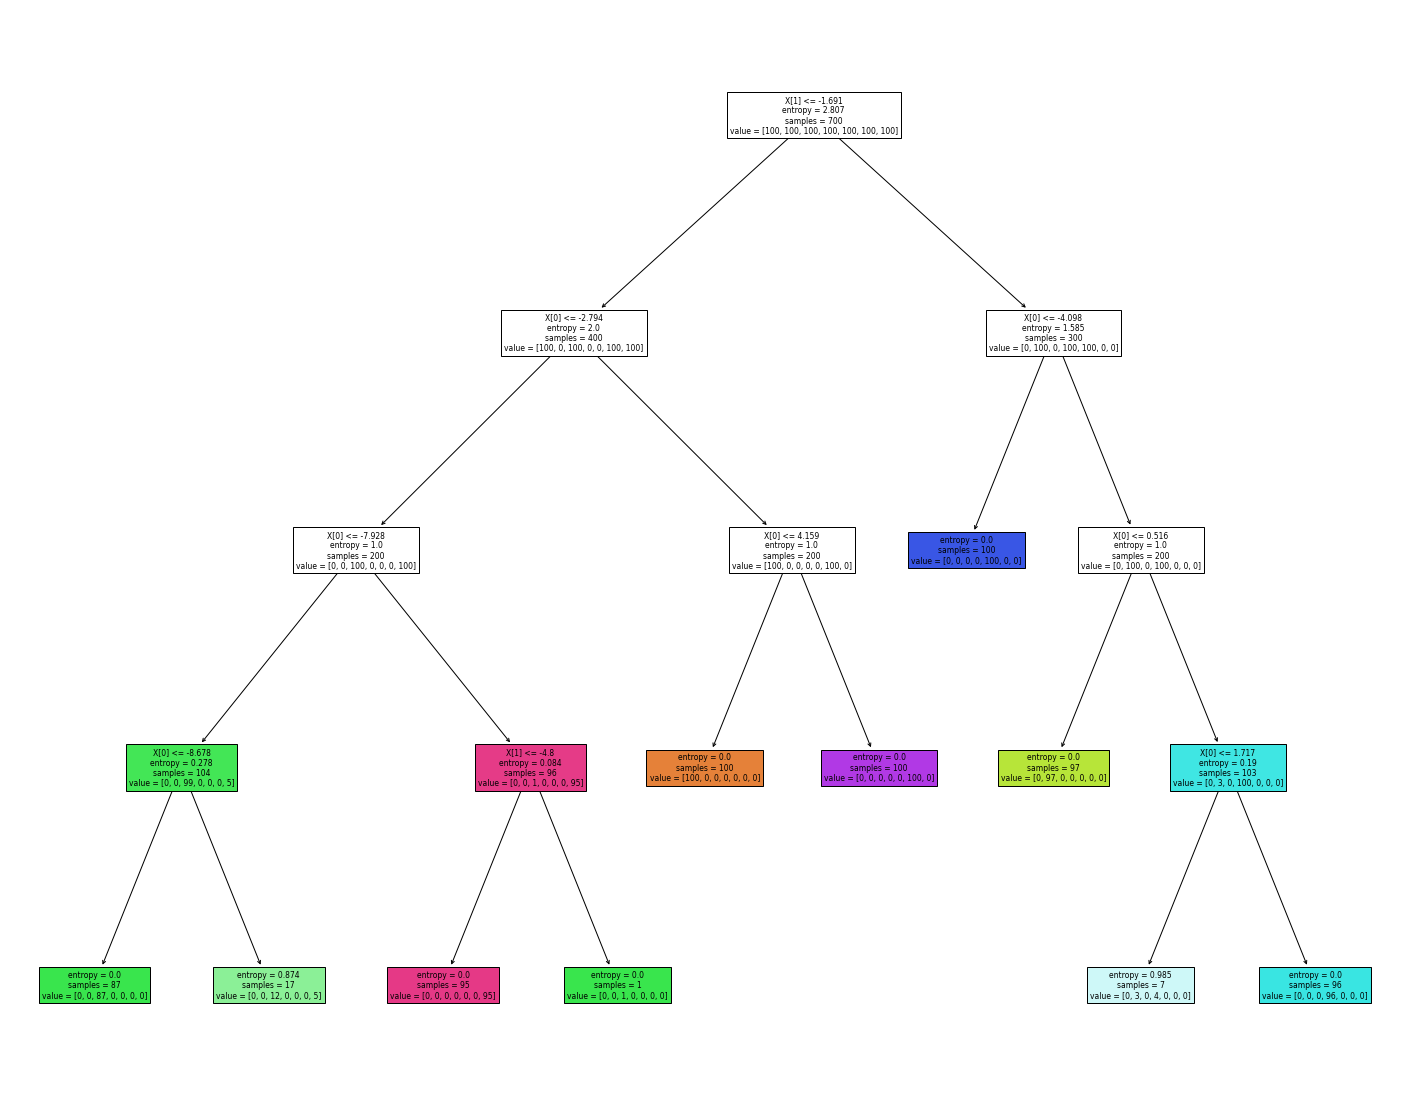

In [4]:
X, Y = make_blobs(n_samples=700, centers=7, n_features=2,\
random_state=100,cluster_std=1)
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
y =  np.expand_dims(y, axis=1)
dt_entropy.fit(X, Y)


from mlxtend.plotting import plot_decision_regions
 

 
fig, ax = plt.subplots(figsize=(6, 4))
plot_decision_regions(X, Y, clf=dt_entropy)

plt.tight_layout()
plt.show()
import numpy as np
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_entropy, 
                   
                   filled=True)

In [5]:
#X = np.array([[4,5],[4.5,3],[4,7],[5,7.5],[6,5],[7,5]])
#Y = np.array([0,0,0,0,1,1])

no_centers =7
depth = 4
rndm_state = 100
num_samples = no_centers *10
positive_samples = (num_samples//no_centers)
negative_samples = (num_samples-positive_samples)

X, Y = make_blobs(n_samples=num_samples, centers=no_centers, n_features=2,random_state=rndm_state,cluster_std=1);

x_min, x_max = X[:,0].min() -2 , X[:,0].max() +2
y_min, y_max = X[:,1].min() -2, X[:,1].max() +2
h = 1/depth

  # Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
T = np.zeros((xx.shape[0]*xx.shape[1],1))

for p in range(no_centers):
  X, Y = make_blobs(n_samples=num_samples, centers= no_centers, n_features=2,random_state=rndm_state,cluster_std=1);
  
  Y = (Y==p).astype(int)
  #plt.scatter(X[:,0],X[:,1],c=Y)

  x_min, x_max = X[:,0].min() -2 , X[:,0].max() +2
  y_min, y_max = X[:,1].min() -2, X[:,1].max() +2
  
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole grid
  print('xx shape:', xx.shape)
  Xn = (np.c_[xx.ravel(),yy.ravel()])
  print("Hello", Xn)
  IG = []
  for i in range(Xn.shape[0]):
    c1 = (Y[np.where((X[:,0] >= Xn[i,0]) & (X[:,1] >=Xn[i,1]))])

    pos1 = np.count_nonzero(c1)
    #print(pos1)
    neg1 = c1.shape[0]-pos1
    #print(neg1)

    c2 = (Y[np.where((X[:,0] <= Xn[i,0]) & (X[:,1] <=Xn[i,1]))])

    pos2 = np.count_nonzero(c2)
    #print(pos2)
    neg2 = c2.shape[0]-pos2
    #print(neg2)
    c3 = (Y[np.where((X[:,0] >= Xn[i,0]) & (X[:,1] <=Xn[i,1]))])

    pos3 = np.count_nonzero(c3)
    #print(pos1)
    neg3 = c3.shape[0]-pos3
    #print(neg1)

    c4 = (Y[np.where((X[:,0] <= Xn[i,0]) & (X[:,1] >=Xn[i,1]))])

    pos4 = np.count_nonzero(c4)
    #print(pos2)
    neg4 = c4.shape[0]-pos4
    #print(neg2)



    E_root = H(positive_samples,negative_samples)
    PplusN = num_samples


    IG.append(E_root - ( (pos1+neg1)/(PplusN) * H(pos1,neg1) + (pos2+neg2)/(PplusN) * H(pos2,neg2)\
                        + (pos3+neg3)/(PplusN) * H(pos3,neg3) + (pos4+neg4)/(PplusN) * H(pos4,neg4)  ))


  print(IG)
  coord = np.mean(Xn[np.where(IG == max(IG))],axis=0, keepdims=True)

  print(coord)

  P1 = np.count_nonzero(Y[np.where((X[:,0] >= coord[:,0]) & (X[:,1] >=coord[:,1]))])
  P2 = np.count_nonzero(Y[np.where((X[:,0] <= coord[:,0]) & (X[:,1] <=coord[:,1]))])
  P3 = np.count_nonzero(Y[np.where((X[:,0] >= coord[:,0]) & (X[:,1] <=coord[:,1]))])
  P4 = np.count_nonzero(Y[np.where((X[:,0] <= coord[:,0]) & (X[:,1] >=coord[:,1]))])
  P5 = np.count_nonzero(Y[np.where((X[:,0] <= coord[:,0]) )])
  P6 = np.count_nonzero(Y[np.where((X[:,0] >= coord[:,0]) )])
  P7 = np.count_nonzero(Y[np.where((X[:,1] <= coord[:,1]) )])
  P8 = np.count_nonzero(Y[np.where((X[:,1] >= coord[:,1]) )])
  Results = [P1,P2,P3,P4,P5,P6,P7,P8]
  indx = Results.index(max(Results))
  print('Indx',indx)
  print(P1,P2,P3,P4,P5,P6,P7)

  if(indx == 0):
    B = ((Xn[:,0]> coord[:,0]) & (Xn[:,1] > coord[:,1])).astype(int)
    print(B)
  elif(indx ==1):
    B = ((Xn[:,0]<coord[:,0]) & (Xn[:,1] < coord[:,1])).astype(int)
  elif(indx==2):
    B = ((Xn[:,0]> coord[:,0]) & (Xn[:,1] < coord[:,1])).astype(int)
  elif(indx==3):
    B = ((Xn[:,0]< coord[:,0]) & (Xn[:,1] > coord[:,1])).astype(int)
  elif(indx==4):
    B = ((Xn[:,0]< coord[:,0])).astype(int)
  elif(indx==5):
    B = ((Xn[:,0]> coord[:,0])).astype(int)
  elif(indx==6):
    B = ((Xn[:,1]< coord[:,1])).astype(int)
  elif(indx==7):
    B = ((Xn[:,1]> coord[:,1])).astype(int)
  

  B = np.expand_dims(B,axis=1)
   
  T[np.where(B==1),:] = p

T = T.reshape(xx.shape)


xx shape: (86, 100)
Hello [[-13.54115228 -11.02634817]
 [-13.29115228 -11.02634817]
 [-13.04115228 -11.02634817]
 ...
 [ 10.70884772  10.22365183]
 [ 10.95884772  10.22365183]
 [ 11.20884772  10.22365183]]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029655085952567384, 0.005974310813518124, 0.00902768949817051, 0.015273600559501666, 0.015273600559501666, 0.018469002420709424, 0.025012386651155905, 0.028363668483154303, 0.03177034590520689, 0.03177034590520689, 0.04234185754003206, 0.04234185754003206, 0.04234185754003206, 0.04234185754003206, 0.049703329060043766, 0.05348507354021387, 0.0693466895957488, 0.07351045326139405, 0.0820991664667613, 0.0820991664667613, 0.0820991664667613, 0.08653158012685053, 0.08653158012685053, 0.09106141723075589, 0.10528079916660082, 0.10528079916660082, 0.11024728747526896, 0.11024728747526896, 0.11024728747526896, 0.11533641743680056, 0.11533641743680056, 0.11533641743680056, 0.11533641743680056, 0.1205543997261026, 0.12590792907162585, 0.1259079

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'c'
  


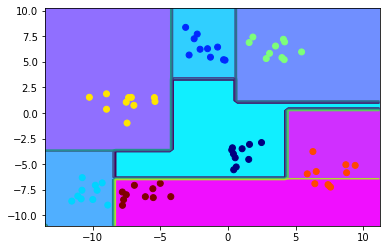

In [6]:
plt.contourf(xx,yy,T,cmap='cool' )
plt.contour(xx,yy,T,c='k' )
#plt.scatter(coord[:,0],coord[:,1],s=40)
X, Y = make_blobs(n_samples=num_samples, centers=no_centers, n_features=2,random_state=rndm_state,cluster_std=1);
plt.scatter(X[:,0],X[:,1],c=Y,cmap='jet')

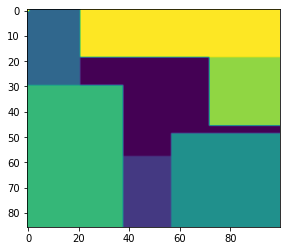

In [7]:
plt.imshow(T)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 

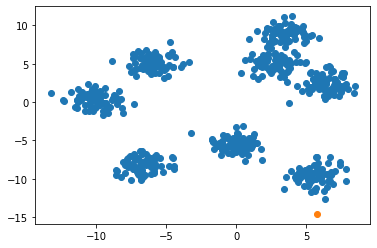

In [8]:
X, Y = make_blobs(n_samples=600, centers=8, n_features=2,\
  random_state=10,cluster_std=1)

Y = (Y==1).astype(int)
print(Y)

P_X = np.squeeze(X[np.where(Y==1),:])
N_X = np.squeeze(X[np.where(Y==0),:])

x_min, x_max = X[:,0].min() -2 , X[:,0].max() + 2
y_min, y_max = X[:,1].min() -2, X[:,1].max() + 2
h = 0.5

# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
print('xx shape:', xx.shape)
Xn = (np.c_[xx.ravel(),yy.ravel()])

def H(p,n):
  h = 0
  
  if (p!=0 & n != 0):
    p1 = p/(p+n)
    n1= n/(p+n)
    h = -(p1*np.log2(p1) + n1*np.log2(n1))
  elif (p== 0 & n != 0):
    n1= n/(p+n)
    h = - n1*np.log2(n1)
  elif (p!= 0 & n == 0):
    p1 = p/(p+n)
    h = -p1*np.log2(p1)
  return h
IG = []
PplusN = 600

E_root = H(200,400)
for i in range(Xn.shape[0]):
  pos_l = list(count_nonzero(P_X<Xn[i,:],axis=1)).count(2)
  neg_l = list(count_nonzero(N_X<Xn[i,:],axis=1)).count(2)
  pos_g = list(count_nonzero(P_X>Xn[i,:],axis=1)).count(2)
  neg_g = list(count_nonzero(N_X>Xn[i,:],axis=1)).count(2)
  ig = E_root - ((pos_g+neg_g)/(PplusN) * H(pos_g,neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l,neg_l))
  IG.append(ig)
  

print(Xn[IG.index(max(IG)),:])
Thr_Points = np.expand_dims(Xn[IG.index(max(IG)),:],axis=1)
print(Thr_Points)
plt.scatter(X[:,0],X[:,1])
#plt.scatter(Xn[:,0],Xn[:,1],s=10)
plt.scatter(Thr_Points[0],Thr_Points[1])

[1 1 2 0 0 1 1 0 0 2 2 2]
[1 1 0 0 0 1 1 0 0 0 0 0]
xx shape: (17, 9)
[ 3.99241197 -6.30504657]
7
72


IndexError: ignored

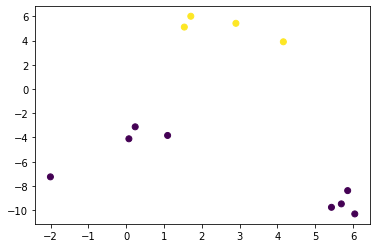

In [9]:


  

X, Y = make_blobs(n_samples=12, centers=3, n_features=2,\
  random_state=10,cluster_std=1)
print(Y)
Y = (Y==1).astype(int)
print(Y)
plt.scatter(X[:,0],X[:,1],c=Y)
P_X = np.squeeze(X[np.where(Y==1),:])
N_X = np.squeeze(X[np.where(Y==0),:])

x_min, x_max = X[:,0].min()  , X[:,0].max() 
y_min, y_max = X[:,1].min() , X[:,1].max() 
h = 1

E_root = H(4,8)
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
print('xx shape:', xx.shape)
Xn = (np.c_[xx.ravel(),yy.ravel()])

IGX = []
IGY = [] 
for i in range(Xn.shape[0]):
 
  pos_l = sum(P_X[:,0]<Xn[i,0])
  neg_l = sum(N_X[:,0]<Xn[i,0])
  pos_g = sum(P_X[:,0]>Xn[i,0])
  neg_g = sum(N_X[:,0]>Xn[i,0])
  igX = E_root - ((pos_g+neg_g)/(PplusN) * H(pos_g,neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l,neg_l))
  IGX.append(igX)
  pos_l,pos_g,neg_l,neg_g = 0,0,0,0
  pos_l = sum(P_X[:,1]<Xn[i,1])
  neg_l = sum(N_X[:,1]<Xn[i,1])
  pos_g = sum(P_X[:,1]>Xn[i,1])
  neg_g = sum(N_X[:,1]>Xn[i,1])
  igY = E_root - ((pos_g+neg_g)/(PplusN) * H(pos_g,neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l,neg_l))
  IGY.append(igY)
  

print(Xn[IG.index(max(IG)),:])
maxIGX = max(IGX)
maxIGY = max(IGY)
print(IGX.index(maxIGX))
print(IGY.index(maxIGY))
if maxIGX > maxIGY:
  ThrPoint = Xn[maxIGX,0]

else:
  ThrPoint = Xn[maxIGX,1]
  X = np.delete(X, np.where(
    (X < ThrPoint) )[0], axis=0)



#Thr_Points = np.expand_dims(Xn[IG.index(max(IG)),:],axis=1)
print(ThrPoint)
plt.scatter(X[:,0],X[:,1],c=Y)


In [ ]:
list(count_nonzero(P_X>Xn[22,:],axis=1)).count(1)